In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('fashion-mnist_test.csv')
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
train.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [6]:
test.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [7]:
X_train = train.iloc[:, train.columns != 'label']
y_train = train.iloc[:, train.columns == 'label']
X_train.shape, y_train.shape

((60000, 784), (60000, 1))

In [8]:
X_test = test.iloc[:, test.columns != 'label']
y_test = test.iloc[:, test.columns == 'label']
X_test.shape, y_test.shape

((10000, 784), (10000, 1))

In [11]:
X_train.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [12]:
X_train = X_train.astype('float64') / 255.0
X_test = X_test.astype('float64') / 255.0
X_train.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000004,0.000024,0.000139,0.000400,0.000972,0.001614,0.003160,0.008621,0.022282,0.056819,...,0.135786,0.091375,0.065052,0.070076,0.089470,0.070241,0.033414,0.010797,0.003355,0.000275
std,0.000371,0.001063,0.004793,0.009619,0.016890,0.022887,0.032216,0.055268,0.093410,0.150332,...,0.225668,0.191586,0.164626,0.172416,0.203257,0.177056,0.116137,0.068226,0.036694,0.008337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.227451,0.035294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.062745,0.141176,0.886275,0.643137,0.890196,0.901961,0.878431,1.000000,0.996078,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667


In [13]:
# Resizing the dataset to represent image with dimension 28 * 28 * 1
X_train_reshaped = X_train.values.reshape(-1,28,28,1)
X_test_reshaped = X_test.values.reshape(-1,28,28,1)

In [14]:
X_train_reshaped

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [17]:
X_train_reshaped.shape, X_test_reshaped.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [16]:
model = Sequential()

In [18]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [19]:
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.05)

Epoch 1/10


2024-04-28 23:47:54.078113: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 178752000 exceeds 10% of free system memory.


1782/1782 [==============================] - 76s 42ms/step - loss: 0.3924 - accuracy: 0.8628 - val_loss: 0.3264 - val_accuracy: 0.8857
Epoch 2/10
1782/1782 [==============================] - 75s 42ms/step - loss: 0.2593 - accuracy: 0.9050 - val_loss: 0.2584 - val_accuracy: 0.9020
Epoch 3/10
1782/1782 [==============================] - 76s 43ms/step - loss: 0.2140 - accuracy: 0.9216 - val_loss: 0.2726 - val_accuracy: 0.9000
Epoch 4/10
1782/1782 [==============================] - 74s 42ms/step - loss: 0.1780 - accuracy: 0.9332 - val_loss: 0.2516 - val_accuracy: 0.9070
Epoch 5/10
1782/1782 [==============================] - 74s 41ms/step - loss: 0.1486 - accuracy: 0.9441 - val_loss: 0.2636 - val_accuracy: 0.9057
Epoch 6/10
1782/1782 [==============================] - 76s 43ms/step - loss: 0.1242 - accuracy: 0.9536 - val_loss: 0.2826 - val_accuracy: 0.9037
Epoch 7/10
1782/1782 [==============================] - 75s 42ms/step - loss: 0.1044 - accuracy: 0.9609 - val_loss: 0.2628 - val_accura

In [24]:
y_train.iloc[0].values[0]

2

[2, 9, 6, 0, 3, 4, 5, 8, 7, 1]


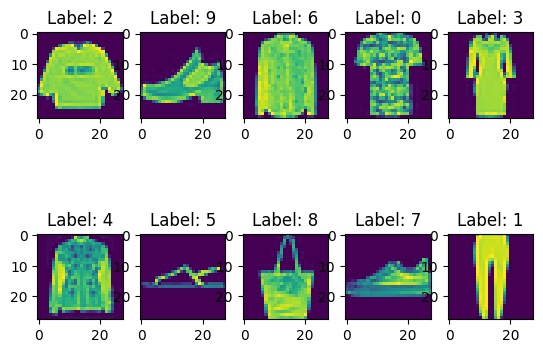

In [30]:
# Finding unique labels
labels = []
r = 0
while len(labels) < 10:
    label = y_train.iloc[r].values[0]
    if label not in labels:
        labels.append(label)
        plt.subplot(2, 5, len(labels))
        plt.imshow(X_train_reshaped[r])
        plt.title(f'Label: {label}')
    r += 1

print(labels)

In [33]:
label_names = {
    0: 't-shirts',
    1: 'trousers',
    2: 'sweatshirt',
    3: 'gown',
    4: 'jacket',
    5: 'sandal',
    6: 'shirt',
    7: 'sneakers',
    8: 'hand-bag',
    9: 'ankle-boot'
}

In [36]:
X_test_reshaped[1:2]

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.81960784],
         [0.74509804],
         [0.70980392],
         [0.58823529],
         [0.66666667],
         [0.75686275],
         [0.70588235],
         [0.85882353],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.09411765],
         [0.92156863],
         [0.82352941],
         [0.94509804],
         [0.87058824],
         

In [34]:
def predict(id):
    entry = X_test_reshaped[id:id+1]
    
    pred = model.predict(entry)
    label = label_names[np.argmax(pred)]
    
    plt.imshow(X_test_reshaped[id])
    plt.title(f'Label: {label}')

1/1 [==============================] - 0s 24ms/step


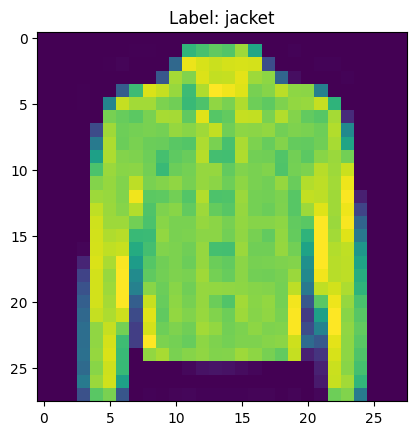

In [38]:
predict(254)

In [41]:
y_prob = model.predict(X_test_reshaped)
y_prob

313/313 [==============================] - 2s 6ms/step


array([[9.9999875e-01, 1.8055973e-15, 4.8337773e-07, ..., 4.1598253e-11,
        2.8323156e-11, 1.6019056e-15],
       [1.3086908e-12, 9.9999994e-01, 4.5296394e-16, ..., 5.5548685e-32,
        5.6839987e-16, 1.6720400e-25],
       [4.4241017e-03, 2.2428428e-12, 9.8397231e-01, ..., 2.5855362e-09,
        5.8959859e-09, 1.4606753e-10],
       ...,
       [2.0875409e-26, 2.8290099e-33, 3.2818016e-30, ..., 3.5145094e-24,
        9.9999994e-01, 2.7213496e-32],
       [1.4130243e-10, 2.2107651e-15, 6.6334082e-18, ..., 1.1333688e-15,
        9.9999994e-01, 2.2729761e-16],
       [2.5264265e-08, 9.9991864e-01, 2.8855007e-08, ..., 7.8502356e-19,
        4.3527358e-08, 5.2943739e-13]], dtype=float32)

In [42]:
y_pred = []
for pred in y_prob:
    y_pred.append(np.argmax(pred))
y_pred

[0,
 1,
 2,
 2,
 3,
 0,
 8,
 6,
 5,
 0,
 3,
 2,
 4,
 6,
 8,
 5,
 6,
 3,
 6,
 4,
 4,
 4,
 2,
 1,
 5,
 7,
 8,
 4,
 4,
 1,
 5,
 7,
 7,
 8,
 1,
 0,
 9,
 8,
 0,
 8,
 2,
 0,
 4,
 2,
 2,
 0,
 3,
 3,
 2,
 3,
 2,
 4,
 9,
 3,
 0,
 9,
 9,
 4,
 0,
 3,
 4,
 5,
 4,
 6,
 1,
 1,
 0,
 9,
 5,
 2,
 7,
 3,
 4,
 0,
 5,
 7,
 1,
 6,
 1,
 6,
 9,
 8,
 1,
 4,
 4,
 8,
 9,
 4,
 1,
 6,
 3,
 6,
 2,
 2,
 2,
 6,
 4,
 7,
 7,
 3,
 9,
 2,
 9,
 0,
 8,
 4,
 3,
 8,
 2,
 7,
 5,
 5,
 3,
 2,
 7,
 5,
 0,
 2,
 7,
 1,
 0,
 5,
 4,
 4,
 7,
 0,
 8,
 5,
 0,
 3,
 1,
 7,
 9,
 4,
 9,
 6,
 4,
 4,
 6,
 4,
 3,
 3,
 3,
 2,
 2,
 6,
 0,
 0,
 1,
 3,
 4,
 3,
 3,
 1,
 9,
 3,
 3,
 3,
 9,
 5,
 6,
 7,
 7,
 3,
 2,
 4,
 0,
 8,
 7,
 2,
 2,
 8,
 9,
 0,
 2,
 4,
 4,
 5,
 7,
 9,
 9,
 1,
 3,
 9,
 1,
 5,
 5,
 6,
 0,
 7,
 4,
 9,
 1,
 6,
 0,
 0,
 6,
 4,
 0,
 9,
 0,
 4,
 4,
 5,
 5,
 8,
 6,
 2,
 1,
 9,
 3,
 4,
 7,
 1,
 9,
 5,
 9,
 0,
 2,
 8,
 5,
 7,
 7,
 3,
 2,
 4,
 5,
 7,
 8,
 1,
 9,
 5,
 6,
 2,
 9,
 7,
 4,
 0,
 9,
 0,
 1,
 5,
 7,
 7,
 0,
 2,
 4,
 5,
 3,
 3,


In [47]:
y_test.shape

(10000, 1)

In [50]:
d = pd.DataFrame({'y_test':y_test.iloc[:,0], 'y_pred': y_pred[:]})
d

,y_test,y_pred
0,0,0
1,1,1
2,2,2
3,2,2
4,3,3
...,...,...
9995,0,0
9996,6,6
9997,8,8
9998,8,8


In [58]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)

print(f'Mean Absolute Error: {(mae):.2f}')
print(f'Mean Squared Error: {(mse):.2f}')
print(f'Accuracy: {(acc*100):.2f}')

Mean Absolute Error: 0.26
Mean Squared Error: 1.11
Accuracy: 92.21


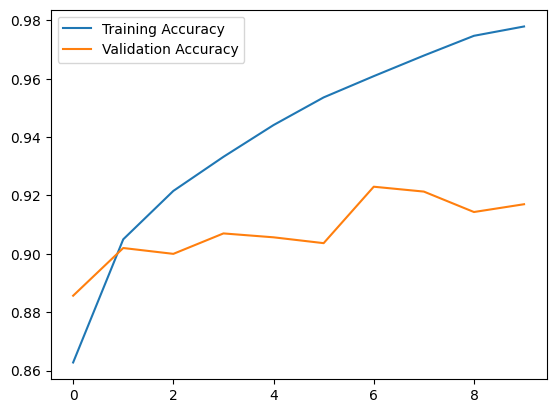

In [59]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

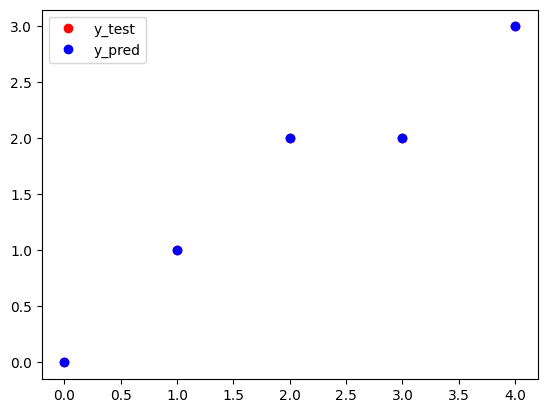

In [61]:
plt.plot(d['y_test'].head(),'ro', label='y_test')
plt.plot(d['y_pred'].head(),'bo', label='y_pred')
plt.legend()